In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리 및 데이터 불러오기

In [13]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.7 MB/s eta 0:00:00


In [2]:
root_path = '/content/drive/MyDrive/olist/'

In [165]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings 
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [411]:
# make sur your install folium first
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [6]:
salvador = pd.read_csv(f'{root_path}salvador_correios.csv')
salvador = salvador.drop(columns = 'Unnamed: 4')
salvador.head()

address   latitude  longitude  \
0           Ceasa, Salvador - State of Bahia, Brazil -12.833351 -38.358990   
1  R. Genaro de Carvalho, 323 - Dom Avelar, Salva... -12.909594 -38.449635   
2  Av. São Cristóvão, 540 - São Cristóvão, Salvad... -12.916220 -38.352150   
3  Av. Luís Viana Filho, 8544 - Paralela, Salvado... -12.924180 -38.393100   
4  Av. Jequitaia, 298 300 - Calçada, Salvador - B... -12.938020 -38.500430   

       city  
0  salvador  
1  salvador  
2  salvador  
3  salvador  
4  salvador

In [7]:
belem = pd.read_csv(f'{root_path}belem_correios.csv')
belem.head()

address  latitude  longitude  \
0  Av. Roberto Camelier, 950 - Jurunas, Belém - P... -1.468361 -48.487670   
1  Av. 16 de Novembro, 443 - Cidade Velha, Belém ... -1.459508 -48.498643   
2  Av. Pres. Vargas, 498 - Campina, Belém - PA, 6... -1.450676 -48.496804   
3  Avenida Visconde de Souza Franco, 776 Piso G1 ... -1.444973 -48.489549   
4  Av. Gov Magalhães Barata, 192 - São Brás, Belé... -1.452035 -48.478987   

    city  
0  belem  
1  belem  
2  belem  
3  belem  
4  belem

In [461]:
sp = pd.read_csv(f'{root_path}saopaulo_correios.csv')
sp.head()

address   latitude  longitude  \
0  Av. das Nações Unidas, 22540 - Jurubatuba, São... -23.588894 -46.677705   
1  R. Mergenthaler, 592 - Vila Leopoldina, São Pa... -23.523503 -46.736561   
2  R. Conselheiro Moreira de Barros, 4200 - loja ... -23.465254 -46.649357   
3  R. Guajurus, 69 - Jardim São Paulo, São Paulo ... -23.490131 -46.615368   
4  Av. Guilherme Cotching, 1225 - Vila Maria, São... -23.508707 -46.589275   

        city  
0  sao paulo  
1  sao paulo  
2  sao paulo  
3  sao paulo  
4  sao paulo

## 📍 Salvador 에서 BentoBox 입지 선정

In [397]:
# salvador 위경도
X_s = salvador[["latitude", "longitude"]].values

In [399]:
random_state = 42
model_s = KMeans(random_state = random_state)
visualizer = KElbowVisualizer(model_s, k=(1,5))
visualizer.fit(X_s)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa75716dd30>,
                 estimator=KMeans(n_clusters=4, random_state=42), k=(1, 5))

In [400]:
k = 2
model_s = KMeans(n_clusters = k, random_state = random_state)
salvador['cluster'] = model_s.fit_predict(X_s)
salvador.sample(10)

address   latitude  longitude  \
1   R. Genaro de Carvalho, 323 - Dom Avelar, Salva... -12.909594 -38.449635   
12  Av. Amaralina, 908 - Amaralina, Salvador - BA,... -13.006000 -38.471050   
5   Estr. da Liberdade, 218 - Liberdade, Salvador ... -12.945720 -38.499060   
14  Avenida Tancredo Neves, 3133, Loja 4004, Piso ... -12.977250 -38.456700   
7   R. Caetano Moura, 05 A - Federação, Salvador -... -12.991220 -38.514170   
2   Av. São Cristóvão, 540 - São Cristóvão, Salvad... -12.916220 -38.352150   
0            Ceasa, Salvador - State of Bahia, Brazil -12.833351 -38.358990   
3   Av. Luís Viana Filho, 8544 - Paralela, Salvado... -12.924180 -38.393100   
6   Av. Sete de Setembro, 2127 - Vitória, Salvador... -12.984190 -38.524810   
17  Av. Tancredo Neves, 1506 - Caminho das Árvores... -12.974140 -38.456650   

        city  cluster  
1   salvador        0  
12  salvador        0  
5   salvador        0  
14  salvador        0  
7   salvador        0  
2   salvador        1  
0   salvador        1  
3   salvador        1  
6   salvador        0  
17  salvador        0

In [403]:
centroids_s = model_s.cluster_centers_
centroids_s

array([[-12.97396529, -38.48036393],
       [-12.89341025, -38.365135  ]])

In [404]:
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, k))

ax = fig.add_subplot(1, 1, 1)

for n, color in zip(range(k), colors):
    label = salvador['cluster'] == n

    center = centroids_s[n]
    ax.plot(X_s[label, 0], X_s[label,1], 'w', markerfacecolor=color, marker='.', markersize = 20)
    ax.plot(center[0], center[1], 'o', markerfacecolor=color, markeredgecolor = 'k', markersize = 20,markeredgewidth='2')

plt.show() 

In [405]:
def cal_dist(dot1, dot2):
    return (dot1[0]-dot2[0])**2 + (dot1[1]-dot2[1])**2

In [410]:
centers = []

for i in range(k):
    cluster_df = salvador[salvador['cluster']==i]
    correios = list(zip(cluster_df['latitude'],cluster_df['longitude'], cluster_df['address']))
    c = correios[0]
    m = np.float('inf')
    for dot in correios:
        if m > cal_dist(centroids_s[i], dot[:2]):
            m = cal_dist(centroids_s[i], dot[:2])
            c = dot
    centers.append(c)
centers

[(-12.98152,
  -38.474,
  'Av. Antônio Carlos Magalhães, 2501 - Parque Bela Vista, Salvador - BA, 40280-970, Brazil'),
 (-12.89989,
  -38.3563,
  'Av. São Cristóvão, 540 - São Cristóvão, Salvador - BA, 40510-970, Brazil')]

### centroids 조정 전

In [381]:
center_location = [-12.927645736794547, -38.43176889740831]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue']
for n in range(k):
    x = salvador[salvador['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in model_s.cluster_centers_.tolist():
    folium.Marker(location = centroid, popup=f'✅ BentoBox \n [{centroid[0]}, {centroid[1]}]').add_to(m)
m

### centroids 조정 후

In [414]:
center_location = [-12.927645736794547, -38.43176889740831]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue']
for n in range(k):
    x = salvador[salvador['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in centers:
    folium.Marker(location = centroid[:2], popup=f'✅ BentoBox 📍 {centroid[2]}').add_to(m)
m

## 📍 Belem 에서의 BentoBox 입지 선정

In [415]:
# Belem 위경도
X_b = belem[["latitude", "longitude"]].values

In [416]:
random_state = 42
model_b = KMeans(random_state = random_state)
visualizer = KElbowVisualizer(model_b, k=(1,5))
visualizer.fit(X_b)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa75707d460>,
                 estimator=KMeans(n_clusters=4, random_state=42), k=(1, 5))

In [417]:
k = 2
model_b = KMeans(n_clusters = k, random_state = random_state)
belem['cluster'] = model_b.fit_predict(X_b)
belem.sample(10)

address  latitude  longitude  \
17  Rod. Mário Covas - Coqueiro, Ananindeua - PA, ... -1.367475 -48.419441   
0   Av. Roberto Camelier, 950 - Jurunas, Belém - P... -1.468361 -48.487670   
15  Condomínio do Castanheira Shoping Center - BR-... -1.401679 -48.434018   
4   Av. Gov Magalhães Barata, 192 - São Brás, Belé... -1.452035 -48.478987   
10  Av. Duque de Caxias, 1139 - Marco, Belém - PA,... -1.427871 -48.462238   
2   Av. Pres. Vargas, 498 - Campina, Belém - PA, 6... -1.450676 -48.496804   
14  Av. Alm. Barroso, 5045 - Castanheira, Belém - ... -1.409160 -48.440272   
6   Av. Sen. Lemos, 1749 - Telégrafo, Belém - PA, ... -1.427866 -48.485257   
8   Av. Pedro Miranda, 1741 - Pedreira, Belém - PA... -1.422519 -48.470284   
9   Av. Duque de Caxias, 1203 - Marco, Belém - PA,... -1.431196 -48.464051   

     city  cluster  
17  belem        1  
0   belem        0  
15  belem        1  
4   belem        0  
10  belem        0  
2   belem        0  
14  belem        1  
6   belem        0  
8   belem        0  
9   belem        0

In [418]:
centroids_b = model_b.cluster_centers_
centroids_b

array([[ -1.44196857, -48.48058933],
       [ -1.39541732, -48.43789599]])

In [419]:
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(centroids_b)))

ax = fig.add_subplot(1, 1, 1)

for n, color in zip(range(k), colors):
    label = belem['cluster'] == n

    center = centroids_b[n]
    ax.plot(X_b[label, 0], X_b[label,1], 'w', markerfacecolor=color, marker='.', markersize = 20)
    ax.plot(center[0], center[1], 'o', markerfacecolor=color, markeredgecolor = 'k', markersize = 20,markeredgewidth='2')

plt.show() 

In [420]:
centers = []

for i in range(k):
    cluster_df = belem[belem['cluster']==i]
    correios = list(zip(cluster_df['latitude'],cluster_df['longitude'], cluster_df['address']))
    c = correios[0]
    m = np.float('inf')
    for dot in correios:
        if m > cal_dist(centroids_b[i], dot[:2]):
            m = cal_dist(centroids_b[i], dot[:2])
            c = dot
    centers.append(c)
centers

[(-1.44497274,
  -48.48954918,
  'Avenida Visconde de Souza Franco, 776 Piso G1 Loja 4, Av. Visc. de Souza Franco, 776 - 4 - Reduto, Belém - PA, 66053-972, Brazil'),
 (-1.401679156,
  -48.43401768,
  'Condomínio do Castanheira Shoping Center - BR-316, 1 - Castanheira, Belém - PA, 66645-000, Brazil')]

### centroids 조정 전

In [425]:
center_location = [-1.3880569825086455, -48.4459695378826]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue']
for n in range(k):
    x = belem[belem['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in model_b.cluster_centers_.tolist():
    folium.Marker(location = centroid, popup=f'✅ BentoBox \n [{centroid[0]}, {centroid[1]}]').add_to(m)
m

### centroids 조정 후

In [422]:
center_location = [-1.3880569825086455, -48.4459695378826]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue']
for n in range(k):
    x = belem[belem['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in centers:
    folium.Marker(location = centroid[:2], popup=f'✅ BentoBox 📍 {centroid[2]}').add_to(m)
m

## 📍 São Paulo 에서의 BentoBox 입지 선정

In [462]:
# Belem 위경도
X_sp = sp[["latitude", "longitude"]].values

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa756bf2760>,
                 estimator=KMeans(n_clusters=6, random_state=42), k=(1, 7))

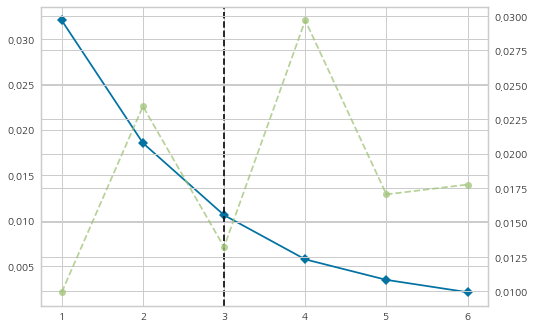

In [463]:
random_state = 42
model_sp = KMeans(random_state = random_state)
visualizer = KElbowVisualizer(model_sp, k=(1,7))
visualizer.fit(X_sp)

In [464]:
k = 4
model_sp = KMeans(n_clusters = k, random_state = random_state)
sp['cluster'] = model_sp.fit_predict(X_sp)
sp.sample(10)

address   latitude  longitude  \
2   R. Conselheiro Moreira de Barros, 4200 - loja ... -23.465254 -46.649357   
18  Alameda Nothmann, 73 - Bom Retiro, São Paulo -... -23.528247 -46.642730   
7   R. Matias Aires, 404 - Consolação, São Paulo -... -23.546166 -46.659657   
4   Av. Guilherme Cotching, 1225 - Vila Maria, São... -23.508707 -46.589275   
13  Rua Cavalheiro Basílio Jafet, 191 - Centro His... -23.541034 -46.629870   
16  Alameda Glete, 1045 - Campos Elíseos, São Paul... -23.535194 -46.650078   
12  Praça Dr. João Mendes, 32 - Centro Histórico d... -23.546614 -46.635568   
14  Praca Pedro Lessa, s/n - Centro Histórico de S... -23.539918 -46.635555   
17  Alameda Barão de Limeira, 871 - Campos Elíseos... -23.531299 -46.648126   
0   Av. das Nações Unidas, 22540 - Jurubatuba, São... -23.588894 -46.677705   

         city  cluster  
2   sao paulo        2  
18  sao paulo        1  
7   sao paulo        1  
4   sao paulo        2  
13  sao paulo        1  
16  sao paulo        1  
12  sao paulo        1  
14  sao paulo        1  
17  sao paulo        1  
0   sao paulo        0

In [465]:
centroids_sp = model_sp.cluster_centers_
centroids_sp

array([[-23.57161868, -46.661134  ],
       [-23.54047339, -46.64162042],
       [-23.48803084, -46.61800003],
       [-23.52350331, -46.73656082]])

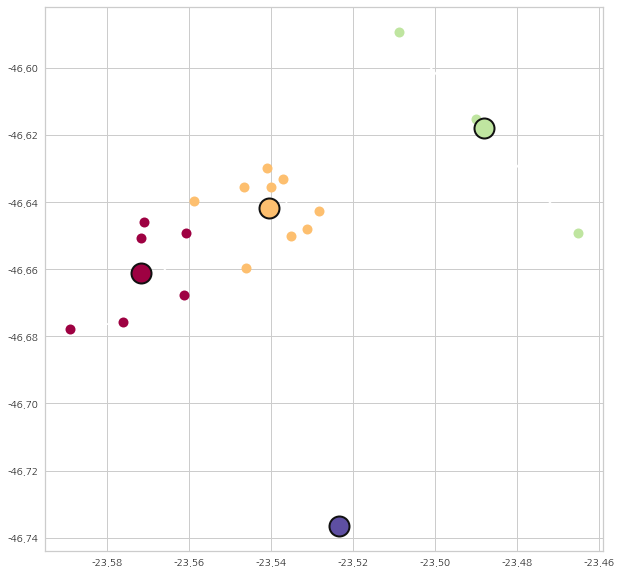

In [467]:
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(centroids_sp)))

ax = fig.add_subplot(1, 1, 1)

for n, color in zip(range(k), colors):
    label = sp['cluster'] == n

    center = centroids_sp[n]
    ax.plot(X_sp[label, 0], X_sp[label,1], 'w', markerfacecolor=color, marker='.', markersize = 20)
    ax.plot(center[0], center[1], 'o', markerfacecolor=color, markeredgecolor = 'k', markersize = 20,markeredgewidth='2')

plt.show() 

In [468]:
centers = []

for i in range(k):
    cluster_df = sp[sp['cluster']==i]
    correios = list(zip(cluster_df['latitude'],cluster_df['longitude'], cluster_df['address']))
    c = correios[0]
    m = np.float('inf')
    for dot in correios:
        if m > cal_dist(centroids_sp[i], dot[:2]):
            m = cal_dist(centroids_sp[i], dot[:2])
            c = dot
    centers.append(c)
centers

[(-23.57165758,
  -46.65073013,
  'R. Tutóia, 811 - Paraíso, São Paulo - SP, 04007-004, Brazil'),
 (-23.53991758,
  -46.63555481,
  'Praca Pedro Lessa, s/n - Centro Histórico de São Paulo, São Paulo - SP, 01031-970, Brazil'),
 (-23.4901312,
  -46.61536789,
  'R. Guajurus, 69 - Jardim São Paulo, São Paulo - SP, 02045-970, Brazil'),
 (-23.52350331,
  -46.73656082,
  'R. Mergenthaler, 592 - Vila Leopoldina, São Paulo - SP, 05311-030, Brazil')]

### centroids 조정 전

In [482]:
center_location = [-23.528930997049294, -46.67558083200687]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue','green','purple']
for n in range(k):
    x = sp[sp['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in model_sp.cluster_centers_.tolist():
    folium.Marker(location = centroid, popup=f'✅ BentoBox \n [{centroid[0]}, {centroid[1]}]').add_to(m)
m

### centroids 조정 후

In [481]:
center_location = [-23.528930997049294, -46.67558083200687]
m = folium.Map(location=center_location, control_scale=True, zoom_start=12)
colors = ['red','blue','green','purple']
for n in range(k):
    x = sp[sp['cluster']==n][['latitude', 'longitude']].values
    for i in x:
        folium.features.CircleMarker(location = i.tolist(),
                                    radius = 10,
                                    color = colors[n],
                                    fill = True,
                                    fill_color = colors[n],
                                    ).add_to(m)

for centroid in centers:
    folium.Marker(location = centroid[:2], popup=f'✅ BentoBox 📍 {centroid[2]}').add_to(m)
m